In [1]:
import pandas as pd


df = pd.read_excel("Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [18]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [23]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

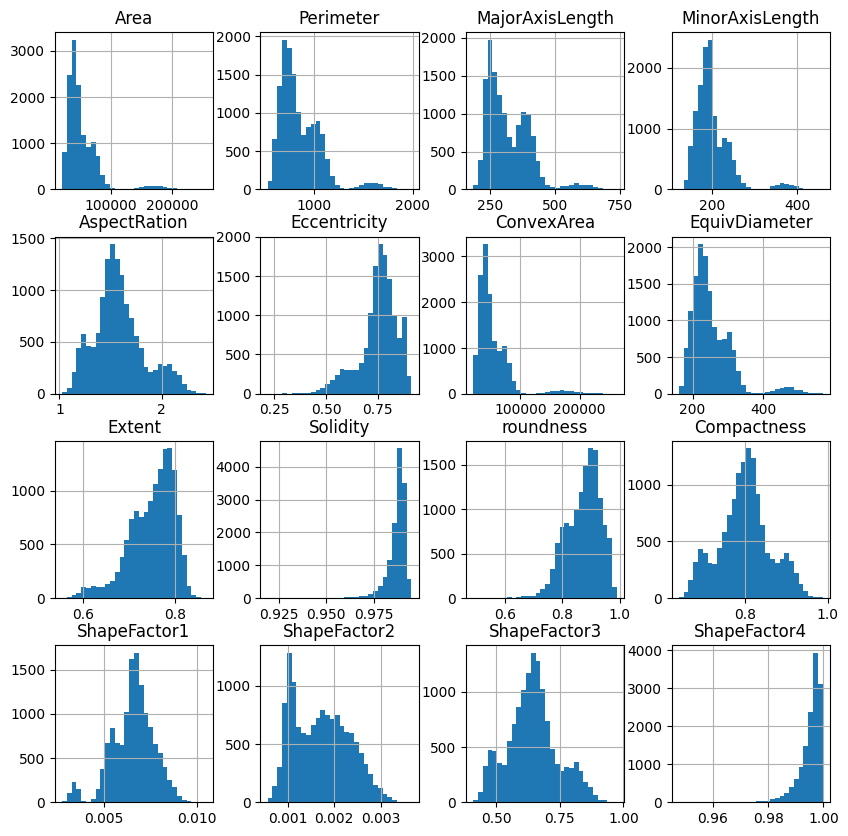

In [22]:
df.hist(bins=30, figsize=(10,10))

In [14]:
from sklearn.decomposition import PCA

def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(df.loc[:, df.columns != "Class"])

In [7]:
col = df.columns.drop('Class')
new_df = pd.DataFrame(scaler, columns=col)

In [11]:
new_df_class = pd.concat([new_df, df['Class']], axis=1)

In [12]:
new_df_class.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER


In [16]:
pca_df = pca_transformation(new_df)

In [17]:
pca_df.head()

,principal component 1,principal component 2
0,-4.981561,1.824697
1,-5.436792,2.932365
2,-4.758088,1.826884
3,-4.300541,2.003661
4,-6.349340,4.088205


In [26]:
pca_df_class = pd.concat([pca_df, df['Class']], axis=1)

In [27]:
pca_df_class

,principal component 1,principal component 2,Class
0,-4.981561,1.824697,SEKER
1,-5.436792,2.932365,SEKER
2,-4.758088,1.826884,SEKER
3,-4.300541,2.003661,SEKER
4,-6.349340,4.088205,SEKER
...,...,...,...
13606,-1.125616,-0.441079,DERMASON
13607,-1.605011,0.495997,DERMASON
13608,-1.417515,0.141194,DERMASON
13609,-1.114666,-0.212679,DERMASON


In [35]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

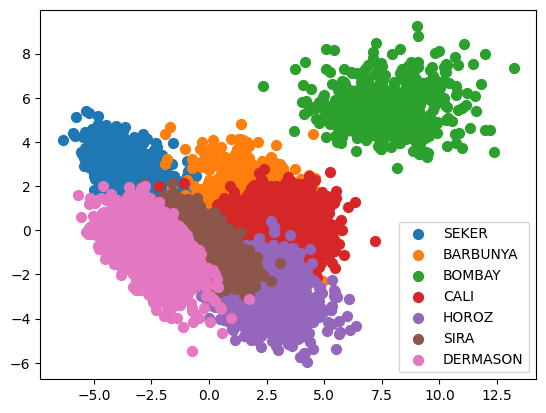

In [49]:
import matplotlib.pyplot as plt

class_names = df['Class'].unique()

# color_class = {"DERMASON":'blue',
#                "SIRA":'green',
#                "SEKER":'red',
#                "HOROZ":'orange',
#                "CALI":'yellow', 
#                "BARBUNAY":'purple',
#                "BOMBAY":'black'}

for class_name in class_names:
    indicesToKeep = pca_df_class['Class'] == class_name
    plt.scatter(pca_df_class.loc[indicesToKeep, 'principal component 1'],
                pca_df_class.loc[indicesToKeep, 'principal component 2'],
                s = 50)

plt.legend(df['Class'].unique())

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto")
km_df = kmeans.fit(pca_df)
test = km_df.predict(pca_df)

In [82]:
test_df = pd.concat([pca_df, pd.Series(test)], axis=1)

In [83]:
test_df

,principal component 1,principal component 2,0
0,-4.981561,1.824697,2
1,-5.436792,2.932365,2
2,-4.758088,1.826884,2
3,-4.300541,2.003661,2
4,-6.349340,4.088205,2
...,...,...,...
13606,-1.125616,-0.441079,4
13607,-1.605011,0.495997,4
13608,-1.417515,0.141194,4
13609,-1.114666,-0.212679,4


In [84]:
test_df.iloc[:,2].unique()

array([2, 1, 3, 4, 6, 0, 5])

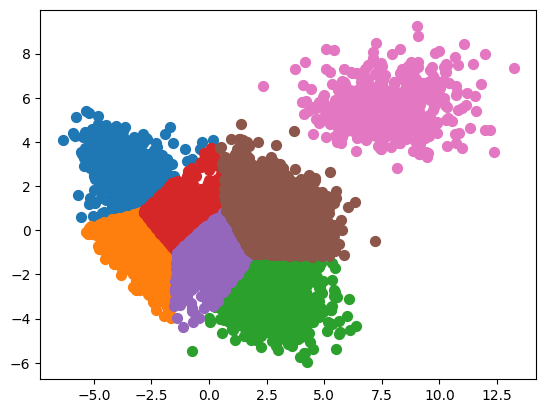

In [85]:
cluster_names = test_df.iloc[:,2].unique()

for class_name in cluster_names:
    indicesToKeep = test_df[0] == class_name
    plt.scatter(test_df.loc[indicesToKeep, 'principal component 1'],
                test_df.loc[indicesToKeep, 'principal component 2'],
                s = 50)